In [671]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Data Preperation

In [386]:
data1 = pd.read_csv('Medicaid_Chronic_Conditions__Inpatient_Admissions_and_Emergency_Room_Visits_by_County__Beginning_2012.csv',\
                   parse_dates=['Year'], infer_datetime_format=True)
data1.head()

,Year,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
0,2012-01-01,Albany,Dual,Substance Abuse,Cocaine Abuse - Continuous,21,20,53,19,139
1,2012-01-01,Allegany,Dual,Diabetes Mellitus,Diabetes with Circulatory Complication,21,10,16,10,22
2,2012-01-01,Allegany,Non-Dual,Diabetes Mellitus,Other Diabetic Complications,21,11,25,15,34
3,2012-01-01,Allegany,Non-Dual,Substance Abuse,Opioid Abuse - Continuous,21,17,25,17,35
4,2012-01-01,Cattaraugus,Dual,Diseases And Disorders Of The Cardiovascular S...,Chronic Cardiovascular Diagnoses - Minor,21,15,23,7,29


In [387]:
# select New York area
Patient = data1[data1['Primary County']=='New York']
Patient.head()

,Year,Primary County,Dual Eligible,Major Diagnostic Category,Episode Disease Category,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
325,2012-01-01,New York,Non-Dual,Diseases And Disorders Of The Cardiovascular S...,"Mechanical Complication of Cardiac Devices, Im...",26,24,122,16,107
634,2012-01-01,New York,Dual,Diseases And Disorders Of The Cardiovascular S...,"Mechanical Complication of Cardiac Devices, Im...",32,29,46,7,12
781,2012-01-01,New York,Dual,Mental Diseases And Disorders,Eating Disorder,35,18,32,13,25
782,2012-01-01,New York,Non-Dual,Substance Abuse,Alcoholic Polyneuropathy,35,34,191,26,351
890,2012-01-01,New York,Dual,Mental Diseases And Disorders,Schizophrenia - Catatonia,37,19,76,14,62


In [359]:
# create list of major disease
MajorCon = Patient['Major Diagnostic Category'].unique()

In [510]:
# create list of episode disease
EpisodeCon = Patient['Episode Disease Category'].unique()

In [17]:
data2 = pd.read_csv('Medicaid_Program_Enrollment_by_Month___Beginning_2009.csv')
data2.head()

,Eligibility Year,Eligibility Month,Economic Region,Aid Category,Dual Eligible,Managed Care vs. Fee For Service,Plan Name,Plan Type,Gender,Age Group,Race,Number of Recipients
0,2009,1,Capital District,FHPLUS,NO,MMC,CDPHP,HMO/PHSP,Female,00-20,ASIAN,5
1,2009,1,Capital District,FHPLUS,NO,MMC,CDPHP,HMO/PHSP,Female,00-20,BLACK,13
2,2009,1,Capital District,FHPLUS,NO,MMC,CDPHP,HMO/PHSP,Female,00-20,HISPANIC,11
3,2009,1,Capital District,FHPLUS,NO,MMC,CDPHP,HMO/PHSP,Female,00-20,OTHER,3
4,2009,1,Capital District,FHPLUS,NO,MMC,CDPHP,HMO/PHSP,Female,00-20,WHITE,52


In [18]:
data2['Economic Region'].unique()

array(['Capital District', 'Central', 'Finger Lakes', 'Long Island',
       'Mid-Hudson', 'Mohawk Valley', 'New York City', 'North Country',
       'Other', 'Southern Tier', 'Western'], dtype=object)

In [146]:
# select New York City area
Enrollment = data2[data2['Economic Region']=='New York City']
Enrollment.head()

,Eligibility Year,Eligibility Month,Economic Region,Aid Category,Dual Eligible,Managed Care vs. Fee For Service,Plan Name,Plan Type,Gender,Age Group,Race,Number of Recipients
5625,2009,1,New York City,FHPLUS,NO,MMC,AFFINITY HEALTH PLAN,HMO/PHSP,Female,00-20,ASIAN,100
5626,2009,1,New York City,FHPLUS,NO,MMC,AFFINITY HEALTH PLAN,HMO/PHSP,Female,00-20,BLACK,143
5627,2009,1,New York City,FHPLUS,NO,MMC,AFFINITY HEALTH PLAN,HMO/PHSP,Female,00-20,HISPANIC,211
5628,2009,1,New York City,FHPLUS,NO,MMC,AFFINITY HEALTH PLAN,HMO/PHSP,Female,00-20,NATIVE AMERICAN,2
5629,2009,1,New York City,FHPLUS,NO,MMC,AFFINITY HEALTH PLAN,HMO/PHSP,Female,00-20,OTHER,66


## Data Cleaning

In [149]:
# find duplicated records
print("Number of duplicated value of Hospital Visits: %s"%Patient.duplicated().sum())
print("Number of duplicated value of Medicaid Enrollment: %s"%Enrollment.duplicated().sum())

Number of duplicated value of Hospital Visits: 0
Number of duplicated value of Medicaid Enrollment: 0


In [150]:
# find missing values
Patient.count()

Year                             415
Primary County                   415
Dual Eligible                    415
Major Diagnostic Category        415
Episode Disease Category         415
Beneficiaries with Condition     415
Beneficiaries with Admissions    415
Total Inpatient Admissions       415
Beneficiaries with ER Visits     415
Total ER Visits                  415
dtype: int64

In [151]:
Enrollment.count()

Eligibility Year                    333293
Eligibility Month                   333293
Economic Region                     333293
Aid Category                        333293
Dual Eligible                       333293
Managed Care vs. Fee For Service    333293
Plan Name                           333293
Plan Type                           333293
Gender                              333293
Age Group                           333293
Race                                333293
Number of Recipients                333293
dtype: int64

In [142]:
# no duplicated records or missing values found

## Visualize the descriptive information

### Medicaid Enrollment 

In [156]:
from datetime import datetime

In [191]:
Enrollment['Date'] = Enrollment.apply(lambda row: datetime(
                              row['Eligibility Year'], row['Eligibility Month'], row['Eligibility Month']), axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [228]:
by_month_total = Enrollment.pivot_table('Number of Recipients', aggfunc='sum',
                            index='Date')

In [220]:
by_month_age = Enrollment.pivot_table('Number of Recipients', aggfunc='sum',
                            index='Date',
                            columns='Age Group')

In [221]:
by_month_gender = Enrollment.pivot_table('Number of Recipients', aggfunc='sum',
                            index='Date',
                            columns='Gender')

In [222]:
by_month_race = Enrollment.pivot_table('Number of Recipients', aggfunc='sum',
                            index='Date',
                            columns='Race')

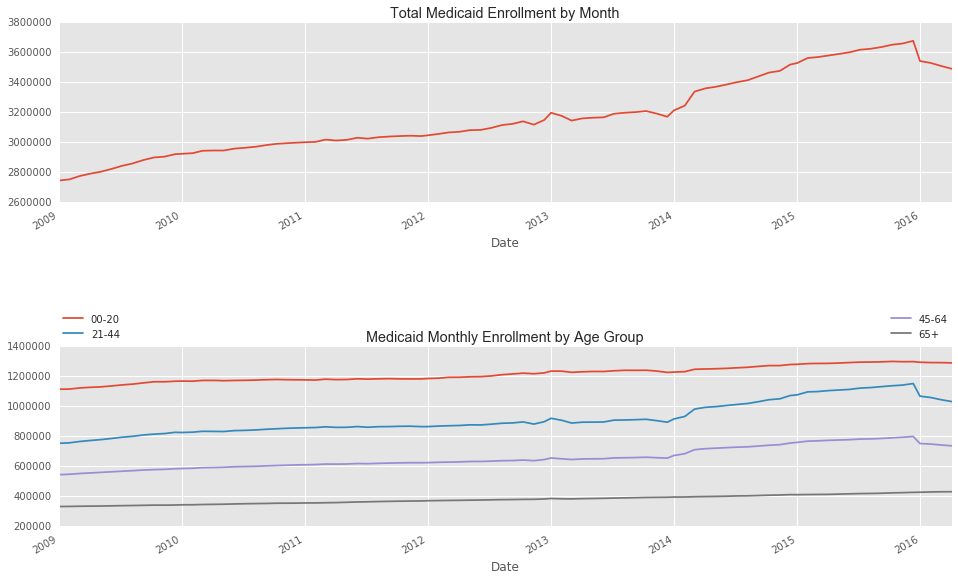

In [605]:
fig, ax = plt.subplots(2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.8)
by_month_total.plot(ax=ax[0], title='Total Medicaid Enrollment by Month')
by_month_age.plot(ax=ax[1], title='Medicaid Monthly Enrollment by Age Group')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('Enrollment_total&age.png')

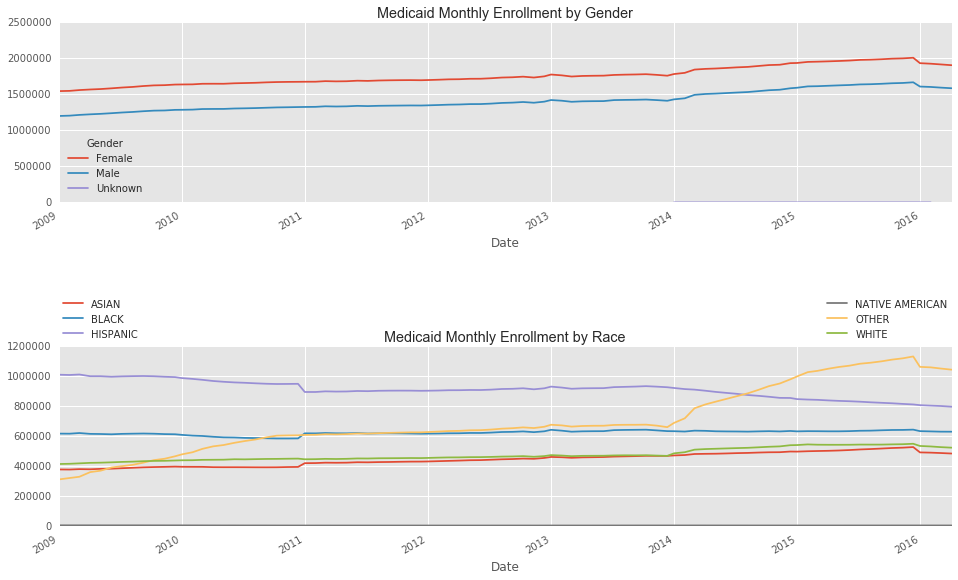

In [606]:
fig, ax = plt.subplots(2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.8)
by_month_gender.plot(ax=ax[0], title='Medicaid Monthly Enrollment by Gender')
by_month_race.plot(ax=ax[1], title='Medicaid Monthly Enrollment by Race')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('Enrollment_gender&race.png')

### Hospital Visits

In [613]:
total_visits = Patient.groupby(['Major Diagnostic Category','Year']).sum()

In [614]:
total_visits['TotalVisits'] = total_visits['Beneficiaries with Condition']\
+total_visits['Beneficiaries with Admissions']\
+total_visits['Total Inpatient Admissions']\
+total_visits['Beneficiaries with ER Visits']\
+total_visits['Total ER Visits']

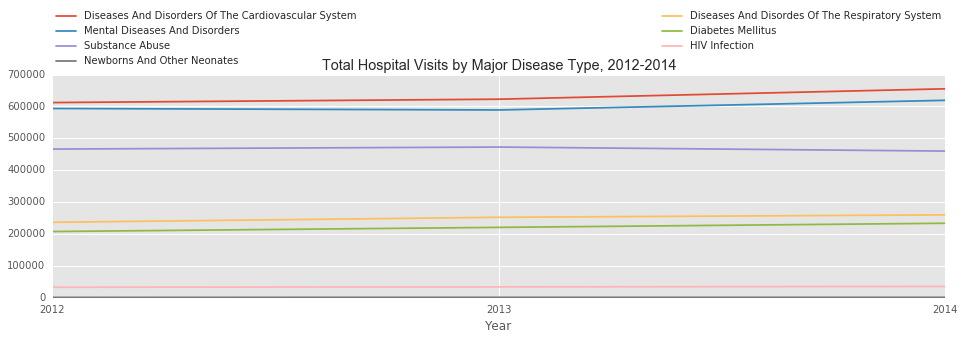

In [629]:
fig, ax = plt.subplots(1, figsize=(16, 4))
for i in MajorCon:
    total_visits.loc['%s'%i].iloc[:,5].plot(label='%s'%i, title='Total Hospital Visits by Major Disease Type, 2012-2014')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('Visits_total.png')

No significant trend over three years' time period.

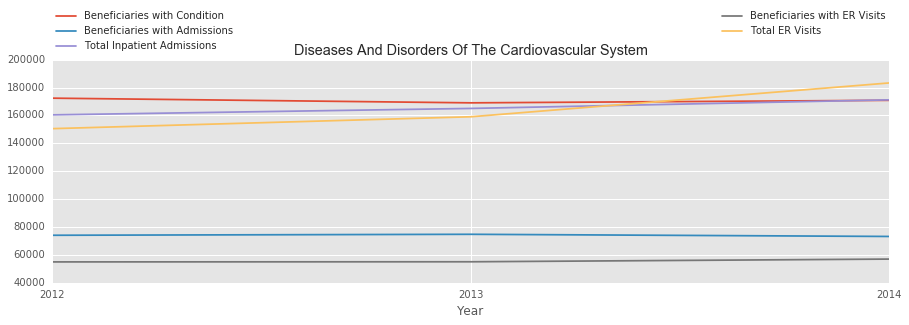

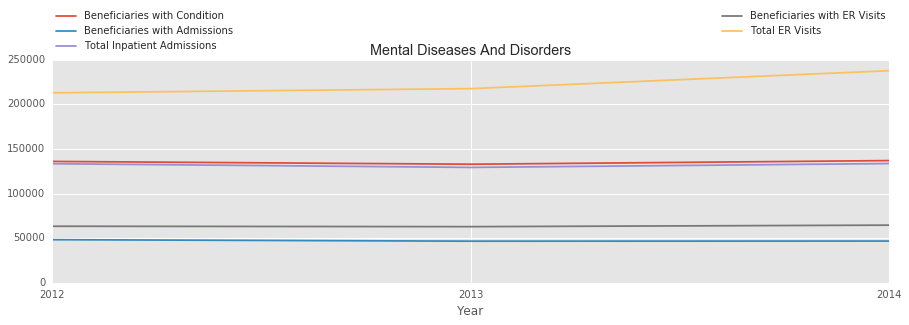

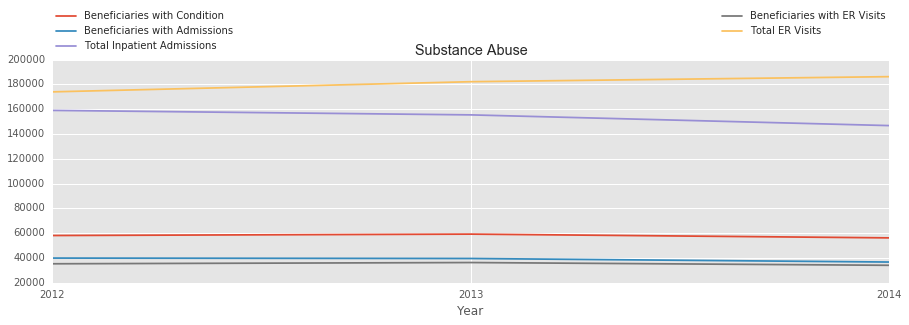

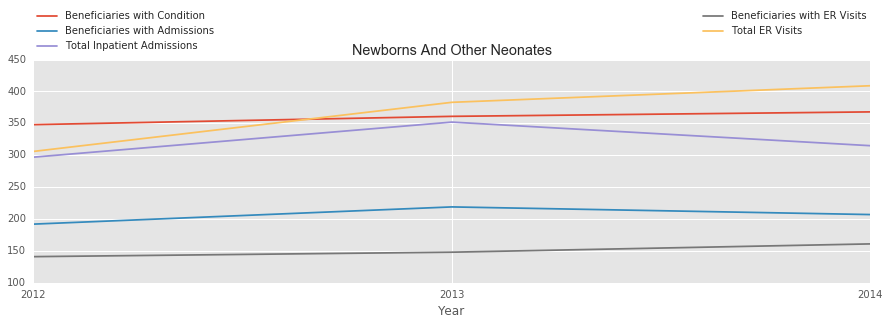

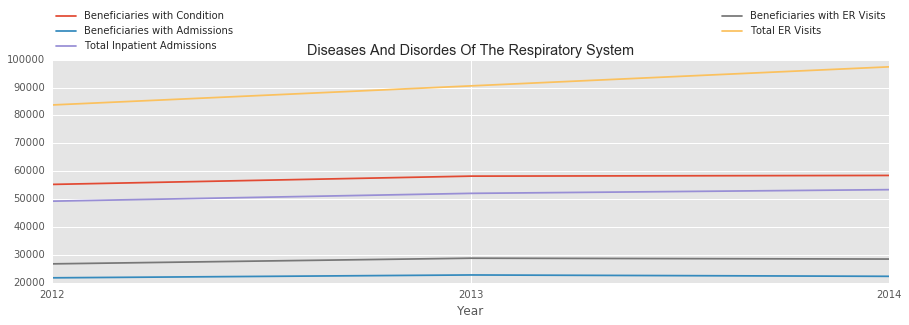

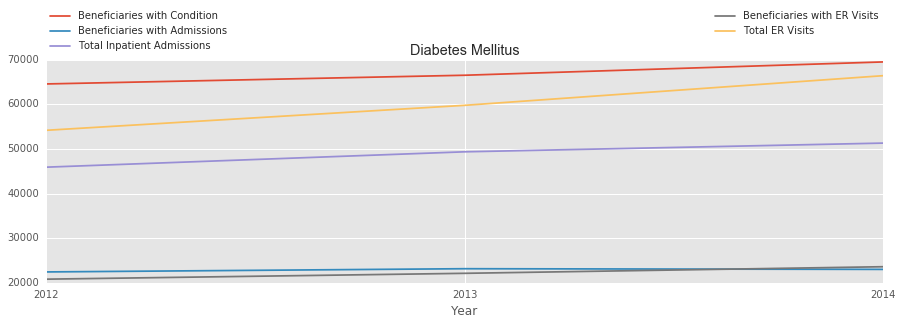

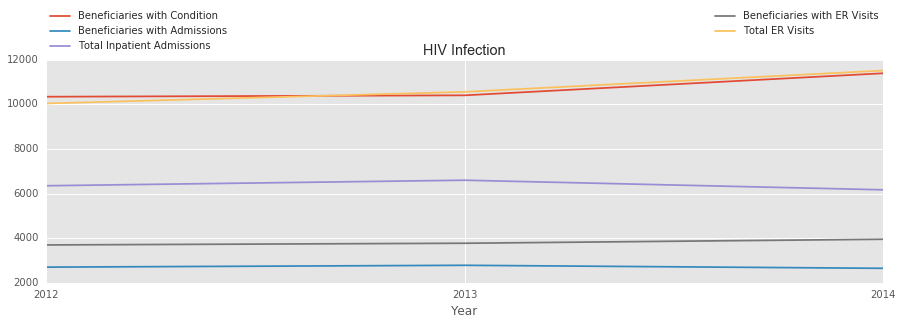

In [628]:
for i in MajorCon:
    #print i
    fig, ax = plt.subplots(1, figsize=(15, 4))
    total_visits.loc['%s'%i].iloc[:,0:5].plot(ax=ax, label='%s'%i, title='%s'%i)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('Visits_disease.png')

## stacked bar chart

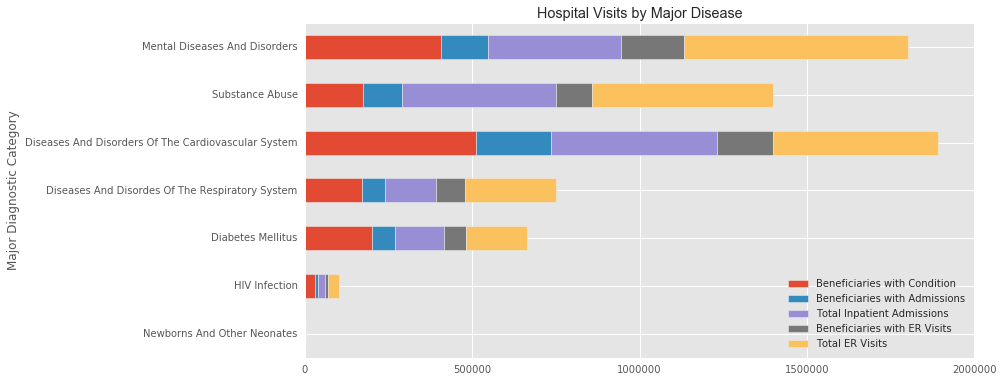

In [697]:
Patient.groupby(['Major Diagnostic Category']).sum().sort_values(by='Total ER Visits').\
plot.barh(stacked=True,figsize=(12, 6),title='Hospital Visits by Major Disease')
plt.savefig('Visits_MD.png')

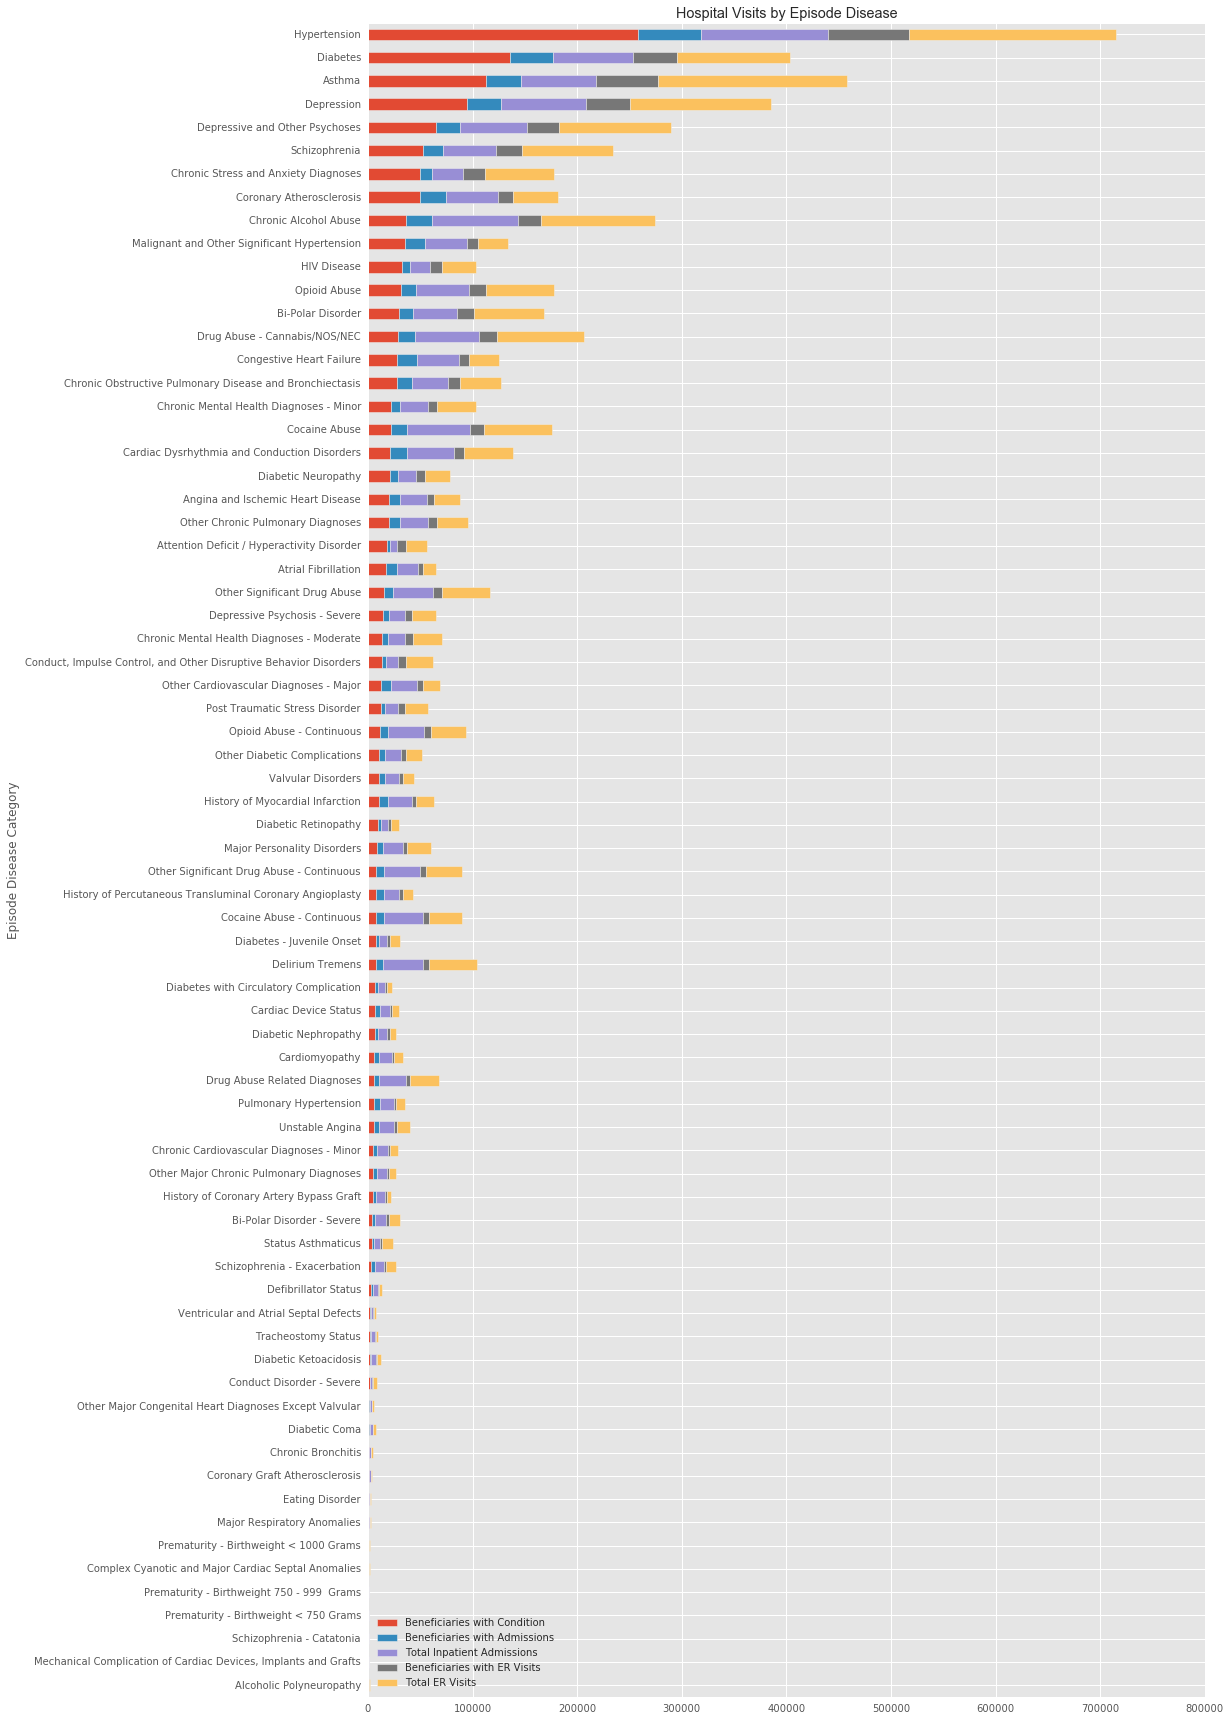

In [669]:
Patient.groupby(['Episode Disease Category']).sum().sort_values(by='Beneficiaries with Condition').\
plot.barh(stacked=True,figsize=(15, 30),title='Hospital Visits by Episode Disease')
plt.savefig('Visits_ED.png')

## Regression and Prediction

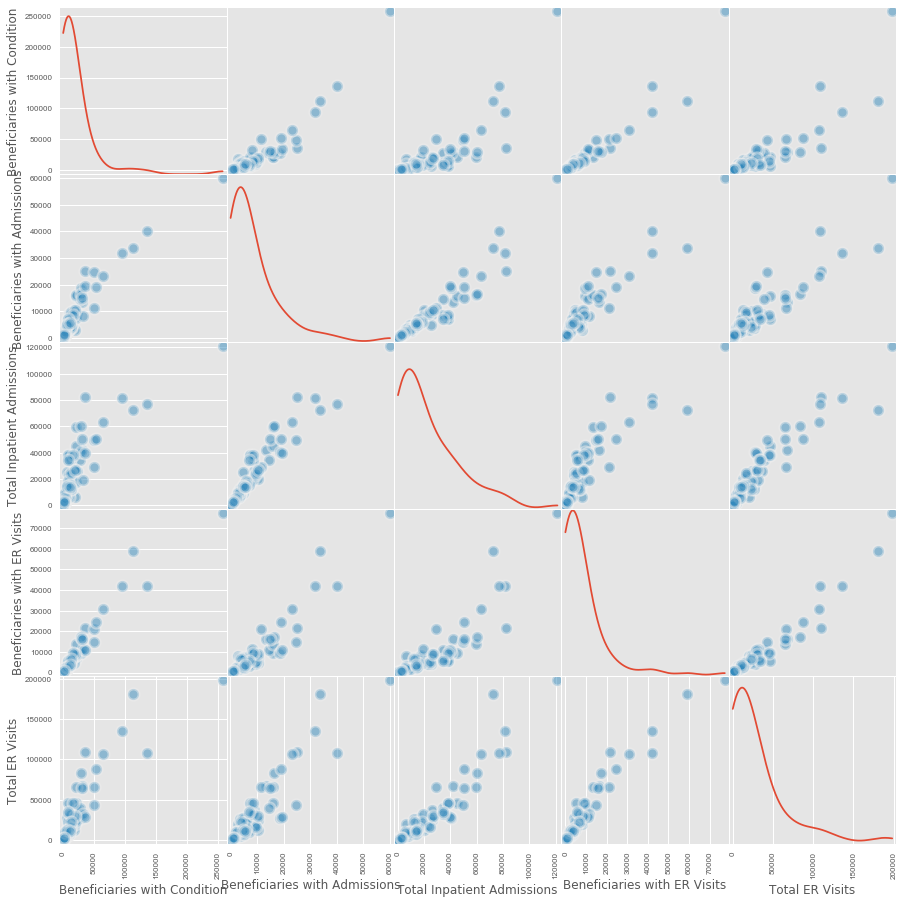

In [634]:
# observe the scatter matrix by type of visits
fig = pd.scatter_matrix(Patient.groupby(['Episode Disease Category']).sum(),
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

All columns that are correlated. 

In [635]:
Model = Patient.groupby(['Major Diagnostic Category']).sum()

In [637]:
Model.head()

,Beneficiaries with Condition,Beneficiaries with Admissions,Total Inpatient Admissions,Beneficiaries with ER Visits,Total ER Visits
Major Diagnostic Category,,,,,
Diabetes Mellitus,200515,68593,146539,66539,180314
Diseases And Disorders Of The Cardiovascular System,512163,222064,496526,167053,492798
Diseases And Disordes Of The Respiratory System,171978,66917,154702,84122,271731
HIV Infection,32123,8135,19110,11419,32099
Mental Diseases And Disorders,405659,141644,396166,190809,667827


In [638]:
col = {'Diseases And Disorders Of The Cardiovascular System':'IndianRed' ,
       'Mental Diseases And Disorders':'blue', 'Substance Abuse':'SteelBlue',
       'Newborns And Other Neonates':'DarkOrange' ,
       'Diseases And Disordes Of The Respiratory System':'olive',
       'Diabetes Mellitus': 'yellow', 'HIV Infection':'green'}

In [642]:
# OLS Regression
smresult = sm.OLS(Model['Beneficiaries with Admissions'],Model['Total Inpatient Admissions']).fit()
smresult.params[0]

0.36338813642019174

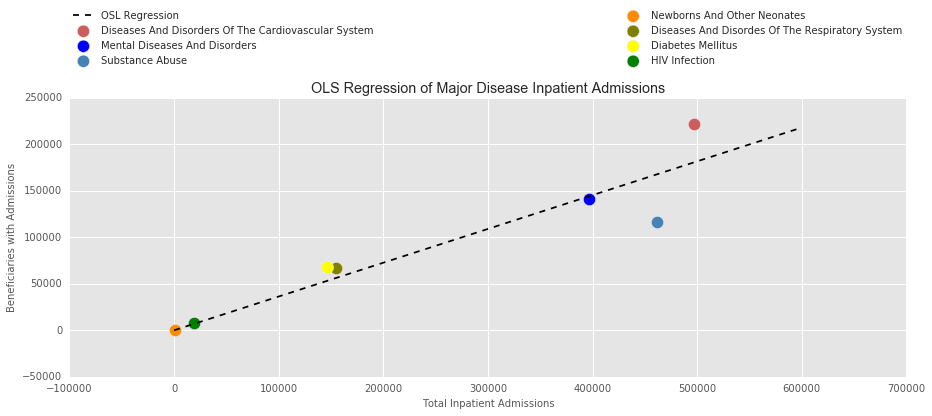

In [667]:
pl.figure(figsize=(15,5))

for i in MajorCon:
    pl.scatter(Model.loc['%s'%i]['Total Inpatient Admissions'], Model.loc['%s'%i]['Beneficiaries with Admissions'],\
               s=150, label=i, c=col[i])
pl.plot([0, 600000], [0, 600000*smresult.params[0]],'k--', label='OSL Regression')   
pl.xlabel('Total Inpatient Admissions', fontsize=10)
pl.ylabel('Beneficiaries with Admissions', fontsize=10)
pl.title('OLS Regression of Major Disease Inpatient Admissions')
plt.legend(bbox_to_anchor=(0., 1.1, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

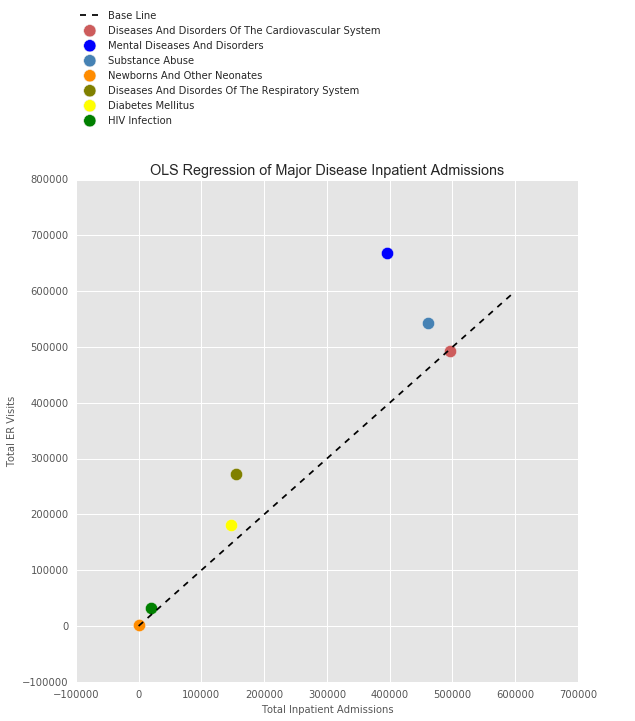

In [695]:
pl.figure(figsize=(9,9))

for i in MajorCon:
    pl.scatter(Model.loc['%s'%i]['Total Inpatient Admissions'], Model.loc['%s'%i]['Total ER Visits'],\
               s=150, label=i, c=col[i])
pl.plot([0, 600000], [0, 600000],'k--', label='Base Line')   
pl.xlabel('Total Inpatient Admissions', fontsize=10)
pl.ylabel('Total ER Visits', fontsize=10)
pl.title('OLS Regression of Major Disease Inpatient Admissions')
plt.legend(bbox_to_anchor=(0., 1.1, 1.1, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

In [639]:
import statsmodels.api as sm

In [657]:
smresult_2 = sm.OLS(Model_2['Beneficiaries with Admissions'],Model_2['Total Inpatient Admissions']).fit()
smresult_2.params[0]

0.38987199760803315

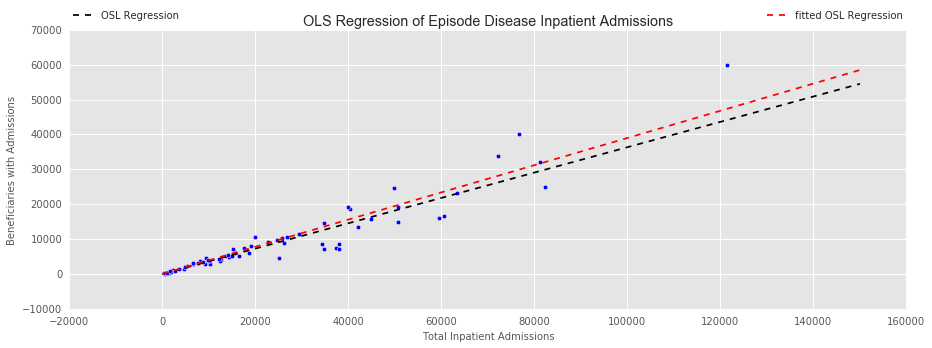

In [661]:
pl.figure(figsize=(15,5))

for i in EpisodeCon:
    pl.scatter(Model_2.loc['%s'%i]['Total Inpatient Admissions'], Model_2.loc['%s'%i]['Beneficiaries with Admissions'])
pl.plot([0, 150000], [0, 150000*smresult.params[0]],'k--', label='OSL Regression') 
pl.plot([0, 150000], [0, 150000*smresult_2.params[0]],'r--', label='fitted OSL Regression')  
pl.xlabel('Total Inpatient Admissions', fontsize=10)
pl.ylabel('Beneficiaries with Admissions', fontsize=10)
pl.title('OLS Regression of Episode Disease Inpatient Admissions')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)